In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go


In [42]:
df = pd.read_csv('alzheimers_disease_data.csv')


# Nouvelle section

In [43]:
print("Shape:", df.shape)


Shape: (2149, 35)


In [44]:
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [45]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [46]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [48]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)


In [49]:
df.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
344,72,0,1,2,26.880676,0,4.402217,6.030440,3.758031,7.005371,...,0.965765,0,0,1.880474,0,0,0,0,0,0
584,90,1,1,1,19.132543,0,3.095348,3.028467,0.811630,7.464480,...,2.081660,0,0,3.375818,0,1,0,0,0,1
452,60,1,3,2,24.332170,0,13.813821,9.551024,9.476242,4.149049,...,0.974061,0,1,9.425958,0,0,0,0,0,1
1163,86,0,1,2,36.643043,0,16.082594,7.823076,9.949134,6.092442,...,4.045506,0,0,7.904185,0,0,0,1,1,0
1108,75,1,0,1,18.739307,1,15.908559,1.597148,7.331074,5.121284,...,2.198884,0,0,7.892097,1,1,0,1,0,0


In [50]:
df = df.drop_duplicates()


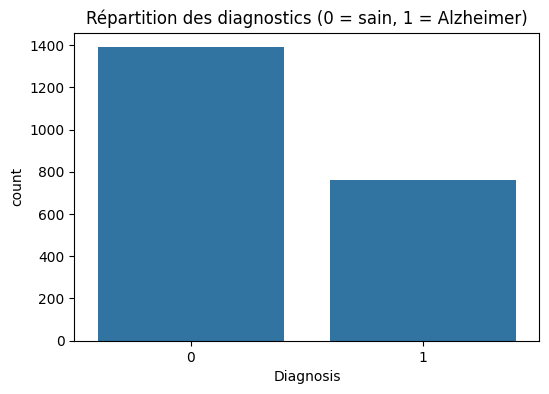

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Répartition des diagnostics (0 = sain, 1 = Alzheimer)')
plt.show()


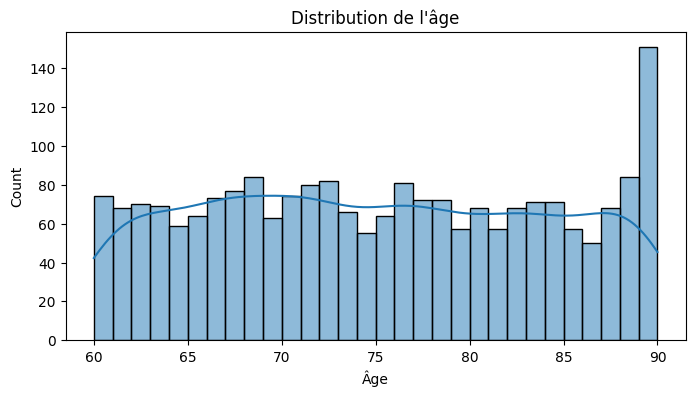

In [52]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.show()


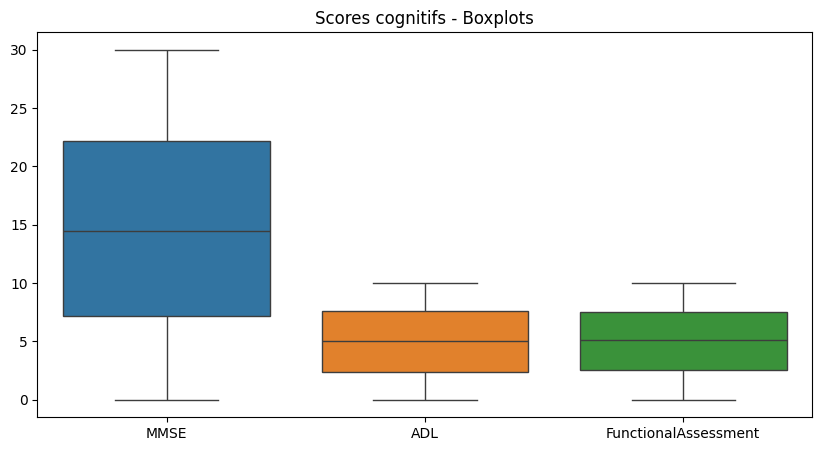

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['MMSE', 'ADL', 'FunctionalAssessment']])
plt.title('Scores cognitifs - Boxplots')
plt.show()

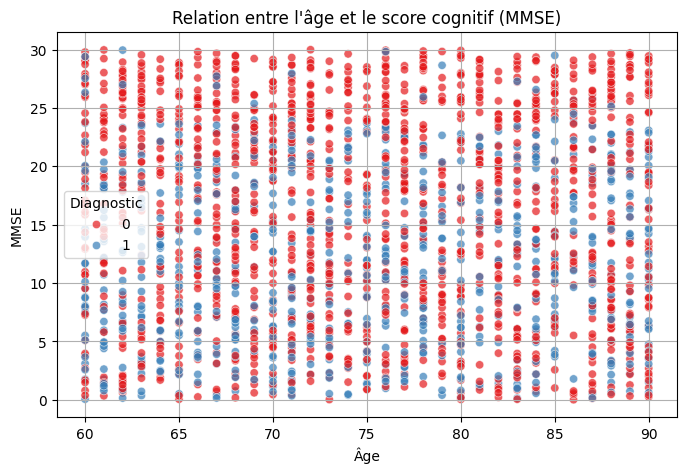

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=df, alpha=0.7, palette='Set1')
plt.title('Relation entre l\'âge et le score cognitif (MMSE)')
plt.xlabel('Âge')
plt.ylabel('MMSE')
plt.legend(title='Diagnostic')
plt.grid(True)
plt.show()


C:\Users\Hazem\AppData\Local\Temp\ipykernel_26748\4250653808.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




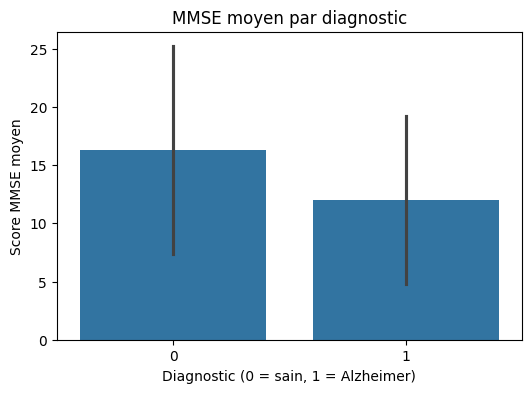

In [55]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Diagnosis', y='MMSE', data=df, estimator=np.mean, ci='sd')
plt.title('MMSE moyen par diagnostic')
plt.xlabel('Diagnostic (0 = sain, 1 = Alzheimer)')
plt.ylabel('Score MMSE moyen')
plt.show()


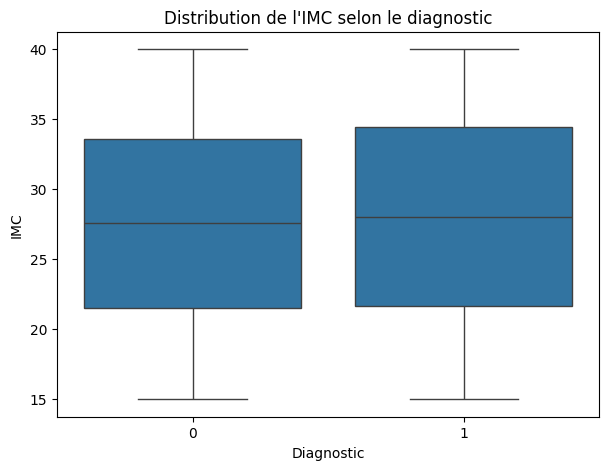

In [56]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title('Distribution de l\'IMC selon le diagnostic')
plt.xlabel('Diagnostic')
plt.ylabel('IMC')
plt.show()


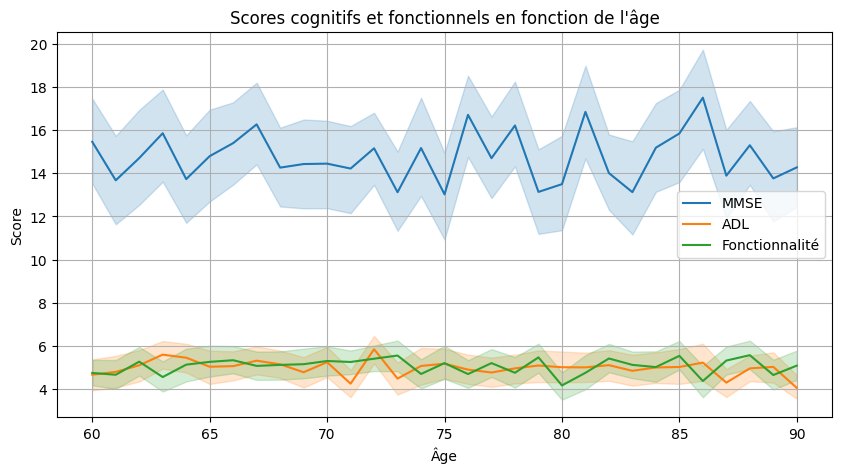

In [57]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='MMSE', data=df.sort_values('Age'), label='MMSE')
sns.lineplot(x='Age', y='ADL', data=df.sort_values('Age'), label='ADL')
sns.lineplot(x='Age', y='FunctionalAssessment', data=df.sort_values('Age'), label='Fonctionnalité')
plt.title('Scores cognitifs et fonctionnels en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


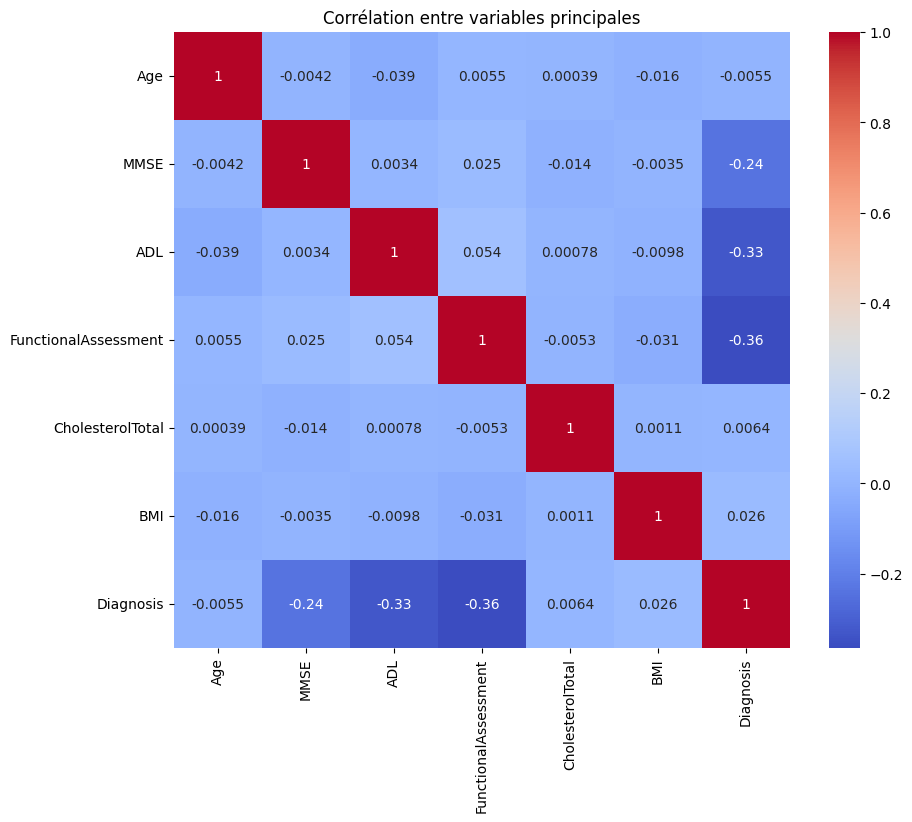

In [58]:
# Sélection de variables principales
cols = ['Age', 'MMSE', 'ADL', 'FunctionalAssessment', 'CholesterolTotal', 'BMI', 'Diagnosis']
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Corrélation entre variables principales')
plt.show()


In [59]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]


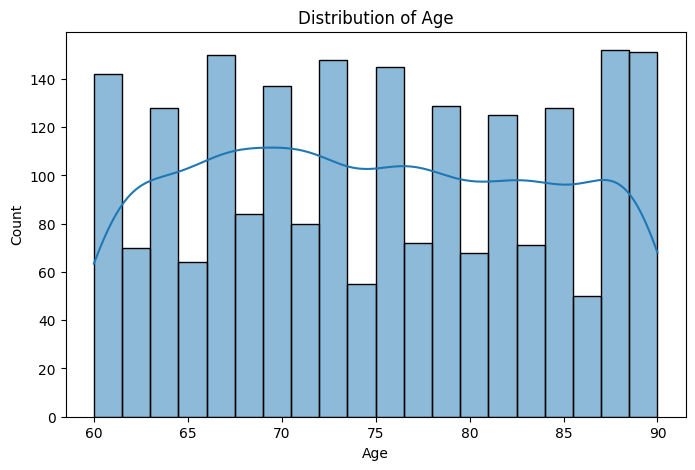

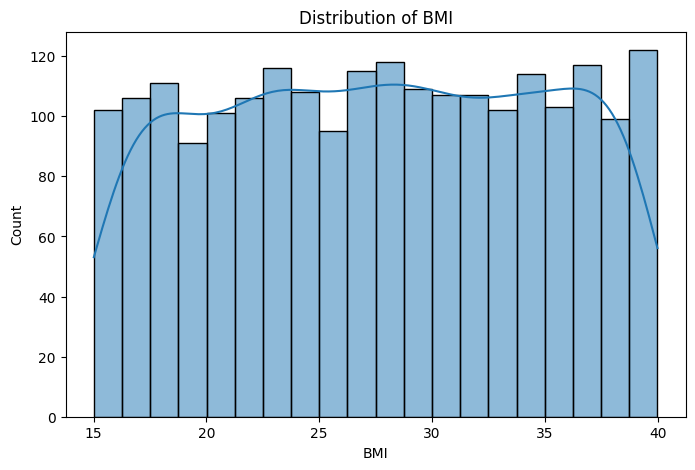

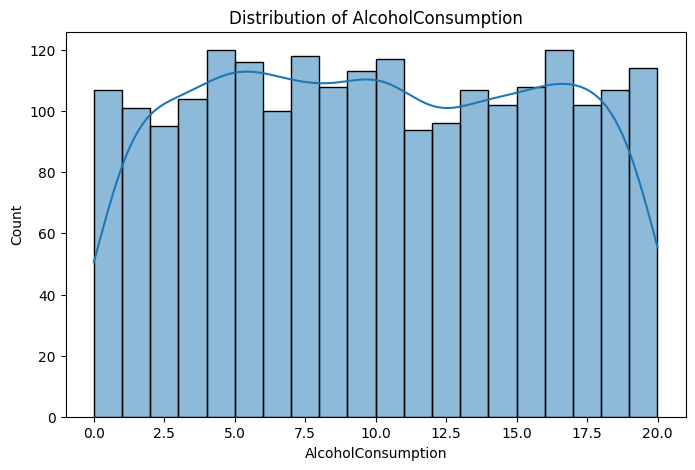

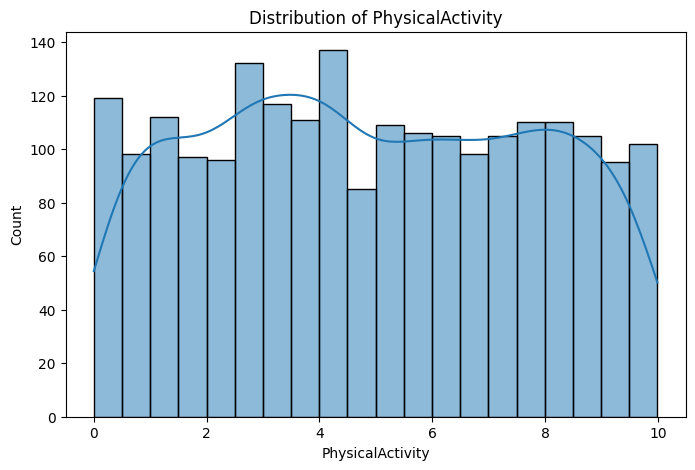

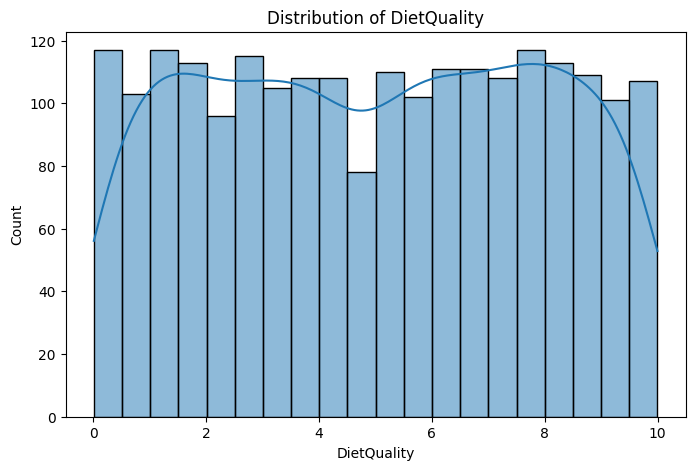

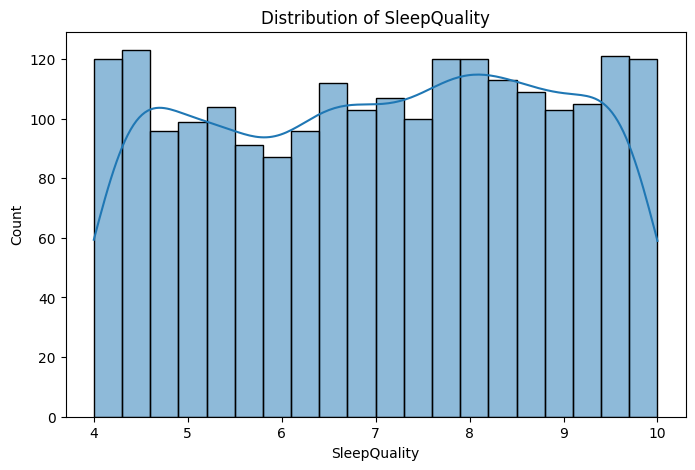

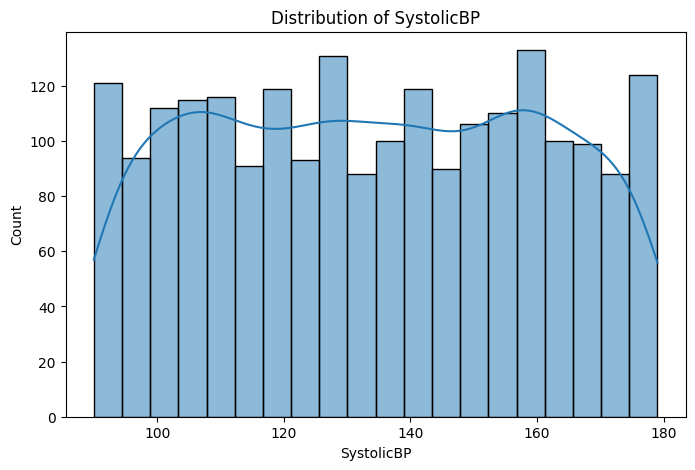

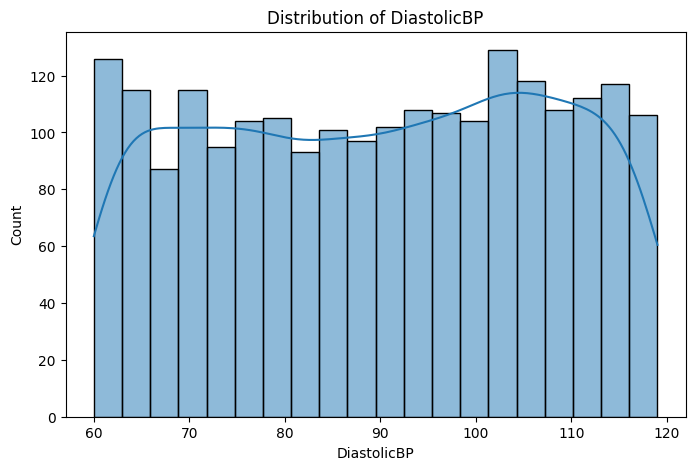

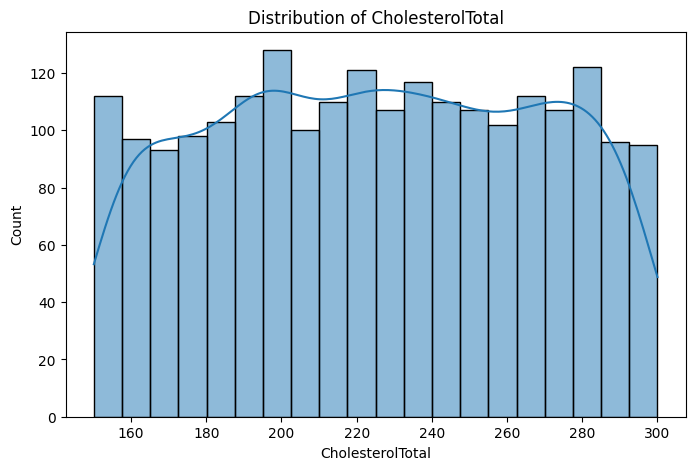

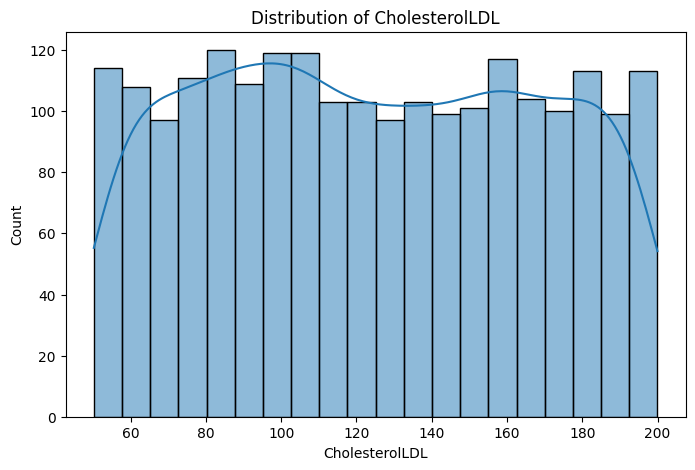

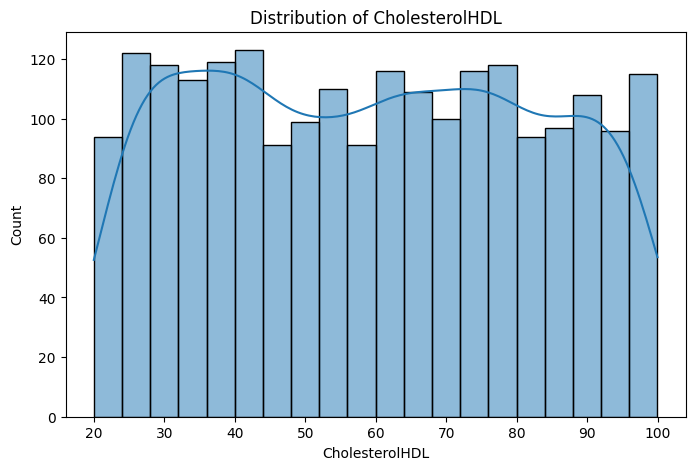

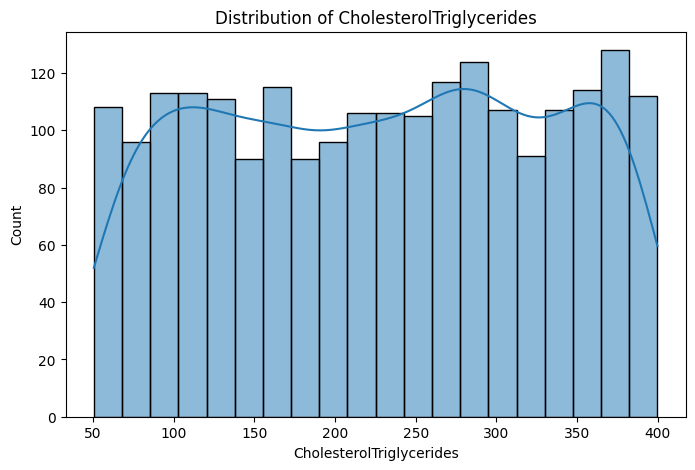

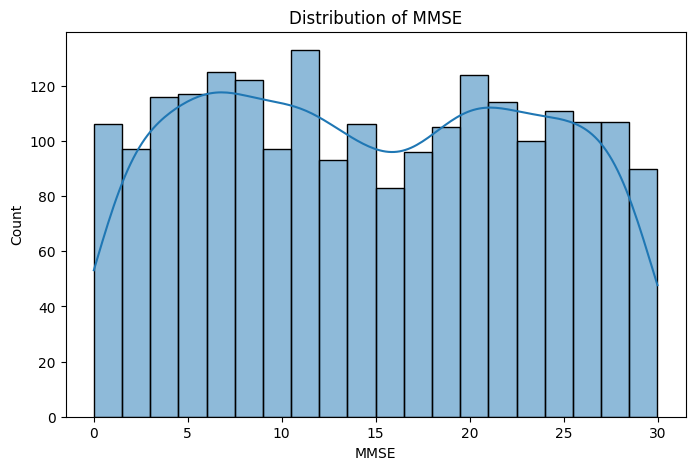

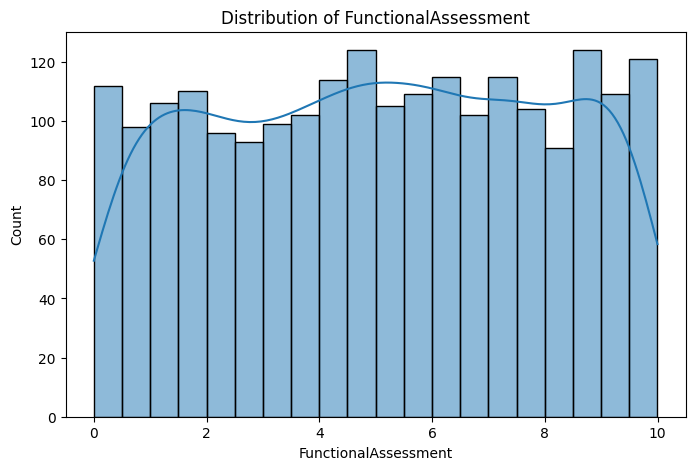

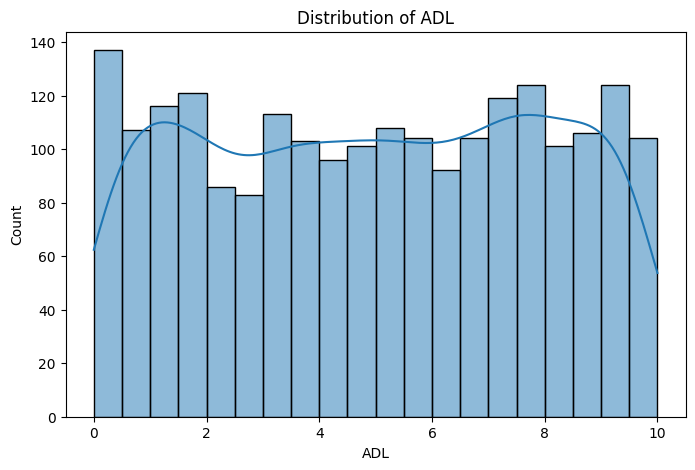

In [60]:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

c:\Users\Hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



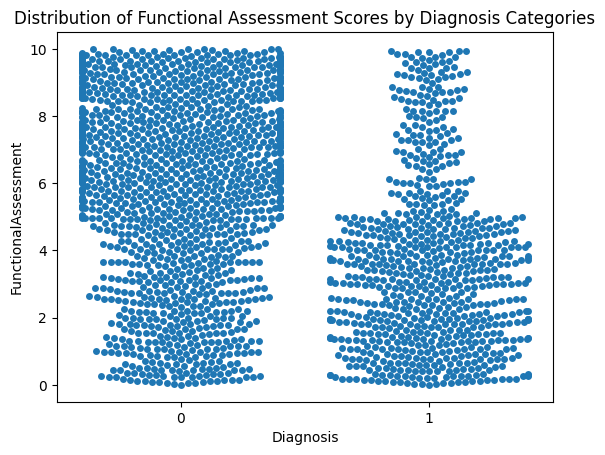

In [61]:
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

c:\Users\Hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



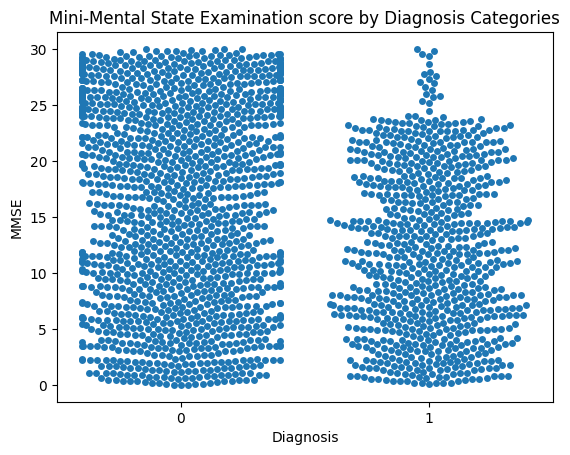

In [62]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

c:\Users\Hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning:

17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



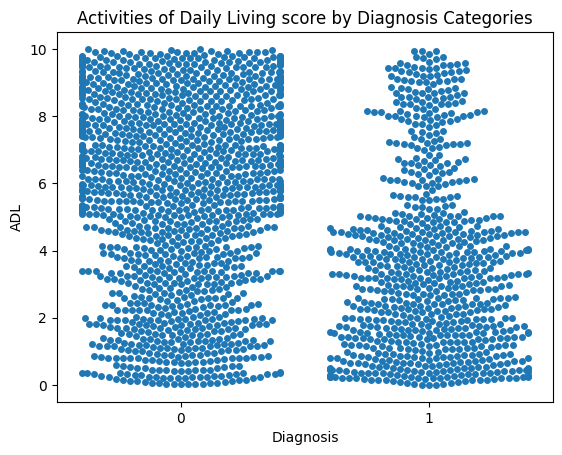

In [63]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

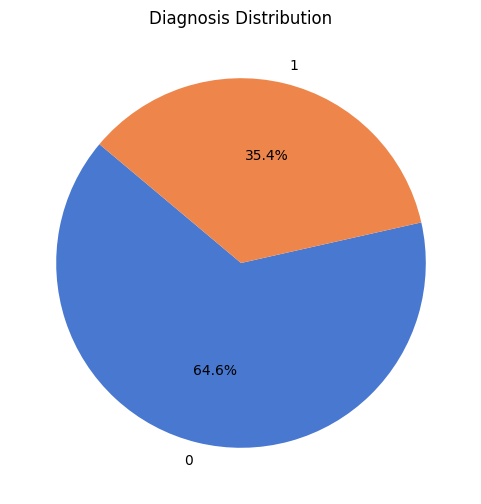

In [64]:
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

colors = sns.color_palette("muted")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

In [65]:
df


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [66]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [67]:
df


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,...,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,...,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,...,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,...,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,...,0.032446,0,0,-0.406078,0,0,0,0,1,1


In [68]:
X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']
results = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, shuffle = True)

In [ ]:
param_grids = {
    'Decision Tree': {'model__max_depth': [3, 5, 7, None]},
    'Random Forest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7, None]},
    'K-Nearest Neighbors': {'model__n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10]},
    'Support Vector Machine': {'model__C': [0.1, 1, 10], 'model__kernel': ['rbf', 'linear']},
    'AdaBoost': {'model__n_estimators': [50, 100]},
}
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}


In [70]:
def train_model(model_name, model, param_grid, X_train, y_train):
    pipeline = Pipeline([('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model


In [71]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy


In [72]:
def save_model_result(model_name, model, train_acc, test_acc):
    global results
    results.append({
        'model_name': model_name,
        'train_accuracy': round(train_acc, 4),
        'test_accuracy': round(test_acc, 4)
    })
    global results_df
    results_df = pd.DataFrame(results)


In [73]:
def plot_prediction_distribution(y_true, y_pred, model_name):
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=y_true, name='Actual', opacity=0.6, marker_color='blue'))
    fig.add_trace(go.Histogram(x=y_pred, name='Predicted', opacity=0.6, marker_color='red'))

    fig.update_layout(
        title=f'Distribution Actuelle vs Prédite - {model_name}',
        xaxis_title='Classe (0 = sain, 1 = Alzheimer)',
        yaxis_title='Fréquence',
        barmode='overlay',
        template='simple_white',
        width=1000,
        height=600
    )
    fig.show()


In [74]:
model_name = 'Decision Tree'
model = DecisionTreeClassifier()
param_grid = {'model__max_depth': [3, 5, 7, None]}

# Entraîner
best_model = train_model(model_name, model, param_grid, X_train, y_train)

# Évaluer
train_acc, test_acc = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Sauvegarder
save_model_result(model_name, best_model, train_acc, test_acc)

# Visualiser
y_test_pred = best_model.predict(X_test)
plot_prediction_distribution(y_test, y_test_pred, model_name)


In [75]:
model_name = 'Random Forest'
model = RandomForestClassifier()
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7, None]
}

# Entraîner
best_model = train_model(model_name, model, param_grid, X_train, y_train)

# Évaluer
train_acc, test_acc = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Sauvegarder
save_model_result(model_name, best_model, train_acc, test_acc)

# Visualiser
y_test_pred = best_model.predict(X_test)
plot_prediction_distribution(y_test, y_test_pred, model_name)


In [76]:
model_name = 'K-Nearest Neighbors'
model = KNeighborsClassifier()
param_grid = {
    'model__n_neighbors': [3, 5, 7]
}

# Entraîner
best_model = train_model(model_name, model, param_grid, X_train, y_train)

# Évaluer
train_acc, test_acc = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Sauvegarder
save_model_result(model_name, best_model, train_acc, test_acc)

# Visualiser
y_test_pred = best_model.predict(X_test)
plot_prediction_distribution(y_test, y_test_pred, model_name)


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Construire un modèle ANN simple
ann_model = Sequential()
ann_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(16, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Sortie binaire

# Compiler
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Prédictions
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")


Epoch 1/50


c:\Users\Hazem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6271 - loss: 0.6402 - val_accuracy: 0.6535 - val_loss: 0.6130
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6271 - loss: 0.6402 - val_accuracy: 0.6535 - val_loss: 0.6130
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 0.5548 - val_accuracy: 0.7256 - val_loss: 0.5525
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 0.5548 - val_accuracy: 0.7256 - val_loss: 0.5525
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.4908 - val_accuracy: 0.7744 - val_loss: 0.4954
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7813 - loss: 0.4908 - val_accuracy: 0.7744 - val_loss: 0.4954
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.4430 - val_accuracy: 0.7977 - val_loss: 0.4588
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.4430 - val_accuracy: 0.7977 - val_loss: 0.4588
Epo

In [78]:
# Rapport de classification
print("\nANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann))

# Matrice de confusion
print("\nConfusion Matrix for ANN:\n")
print(confusion_matrix(y_test, y_pred_ann))



ANN Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       272
           1       0.77      0.77      0.77       158

    accuracy                           0.83       430
   macro avg       0.82      0.82      0.82       430
weighted avg       0.83      0.83      0.83       430


Confusion Matrix for ANN:

[[236  36]
 [ 37 121]]


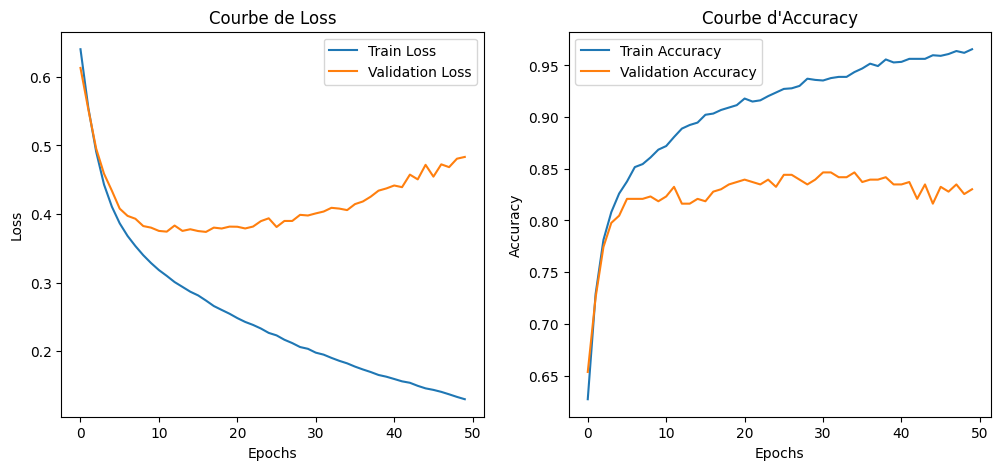

In [79]:
plt.figure(figsize=(12, 5))

# Courbe de perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe d\'Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

results = []

# Refaire les prédictions pour tous les modèles avec leurs meilleurs paramètres
# === Logistic Regression section ===
model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000)
param_grid = param_grids[model_name]
best_model = train_model(model_name, model, param_grid, X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append({'Modèle': model_name, 'Accuracy': acc, 'F1-score': f1})
plot_prediction_distribution(y_test, y_pred, model_name)

# === Support Vector Machine section ===
model_name = 'Support Vector Machine'
model = SVC(probability=True)
param_grid = param_grids[model_name]
best_model = train_model(model_name, model, param_grid, X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append({'Modèle': model_name, 'Accuracy': acc, 'F1-score': f1})
plot_prediction_distribution(y_test, y_pred, model_name)

# === AdaBoost section ===
model_name = 'AdaBoost'
model = AdaBoostClassifier()
param_grid = param_grids[model_name]
best_model = train_model(model_name, model, param_grid, X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results.append({'Modèle': model_name, 'Accuracy': acc, 'F1-score': f1})
plot_prediction_distribution(y_test, y_pred, model_name)

# ANN results (already computed earlier)
acc_ann = accuracy_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
results.append({'Modèle': 'Artificial Neural Network (ANN)', 'Accuracy': acc_ann, 'F1-score': f1_ann})

# Transformer en DataFrame pour l'afficher proprement
results_df = pd.DataFrame(results)

# Afficher les résultats triés par F1-score
results_df = results_df.sort_values(by='F1-score', ascending=False)

print("\nComparaison Finale des Modèles :\n")
print(results_df)


Comparaison Finale des Modèles :

                            Modèle  Accuracy  F1-score
5                Gradient Boosting  0.951163  0.934579
0                    Decision Tree  0.951163  0.934169
6                         AdaBoost  0.939535  0.919753
1                    Random Forest  0.941860  0.919614
7  Artificial Neural Network (ANN)  0.830233  0.768254
3              Logistic Regression  0.816279  0.744337
4           Support Vector Machine  0.811628  0.741214
2              K-Nearest Neighbors  0.753488  0.613139
